# Large Scale Big Data

---
For bigger business, we need to scale up our data processing and machine learning algorithms. In this notebook, we will use PySpark to scale up our data processing and machine learning algorithms. We will use the same dataset as in the previous notebook, but this time we will use PySpark to process the data and run the machine learning algorithms.

In [9]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

from modules.data_preprocessing import PySparkDataPreprocessing
from modules.machine_learning import PySparkKMeans

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
SparkContext.setSystemProperty('spark.hadoop.dfs.client.use.datanode.hostname', 'true')
sc =SparkContext(master="local", appName="Large_Scale_Big_Data")
spark = SparkSession.builder \
    .appName("Large_Scale_Big_Data") \
    .getOrCreate()

bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
24/05/24 14:31:01 WARN Utils: Your hostname, TRONGAN-PC resolves to a loopback address: 127.0.1.1; using 172.30.116.6 instead (on interface eth0)
24/05/24 14:31:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 14:31:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
sc

<SparkContext master=local appName=Large_Scale_Big_Data>

In [4]:
spark

In [5]:
preprocessor = PySparkDataPreprocessing(
    spark=spark, 
    product_file='data/Products_with_Prices.csv',
    transaction_file='data/Transactions.csv',
)
df_transaction, df_rfm = preprocessor.run()

In [6]:
df_transaction.show()

+---------+-------------+-----+--------------------+-----------+--------------------+------------------+---------------+
|productId|Member_number|items|         productName|      price|       TransactionID|      TotalPayment|TransactionDate|
+---------+-------------+-----+--------------------+-----------+--------------------+------------------+---------------+
|        1|         1808|    3|      tropical fruit|7.803532318|3a4d2861-8094-4a8...|      23.410596954|     2015-07-21|
|        2|         2552|    1|          whole milk|        1.8|922f0e50-287b-4db...|               1.8|     2015-01-05|
|        3|         2300|    3|           pip fruit|        3.0|9f09a013-372f-490...|               9.0|     2015-09-19|
|        4|         1187|    3|    other vegetables|        0.8|68f4a410-eadd-48f...|2.4000000000000004|     2015-12-12|
|        2|         3037|    1|          whole milk|        1.8|cdf8251b-5f70-4a3...|               1.8|     2015-02-01|
|        5|         4941|    1| 

In [7]:
df_rfm.show()

+-------------+-------+---------+--------+------------+--------------+-------------+---------+--------------+
|Member_number|Recency|Frequency|Monetary|RecencyScore|FrequencyScore|MonetaryScore|RFM_Score|Customer_Value|
+-------------+-------+---------+--------+------------+--------------+-------------+---------+--------------+
|         1959|     17|       19|  160.61|           1|             5|            5|       11|    High Value|
|         3918|    191|       13|  232.92|           4|             4|            5|       13|    High Value|
|         2122|    267|       10|   82.16|           4|             3|            3|       10|  Medium Value|
|         4101|    244|        8|    98.3|           4|             2|            4|       10|  Medium Value|
|         4818|    285|        8|    43.5|           4|             2|            2|        8|  Medium Value|
|         2142|    188|       19|  156.01|           3|             5|            5|       13|    High Value|
|         

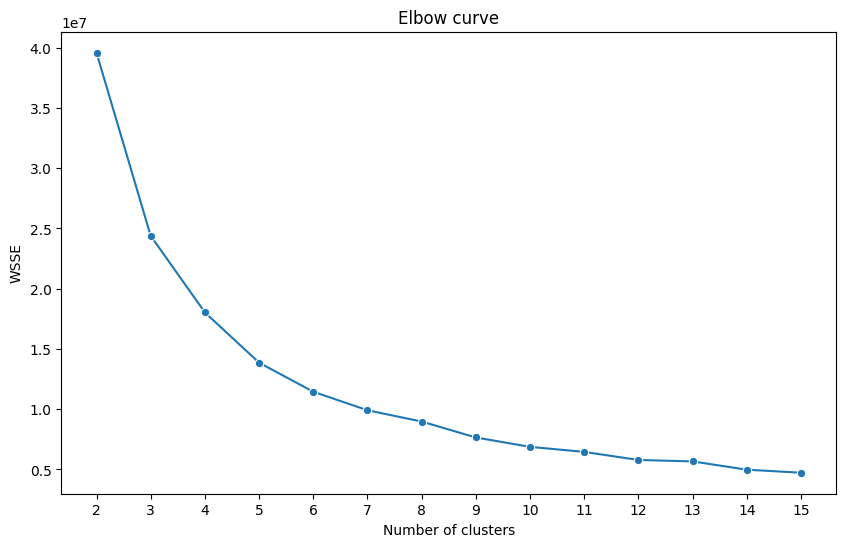

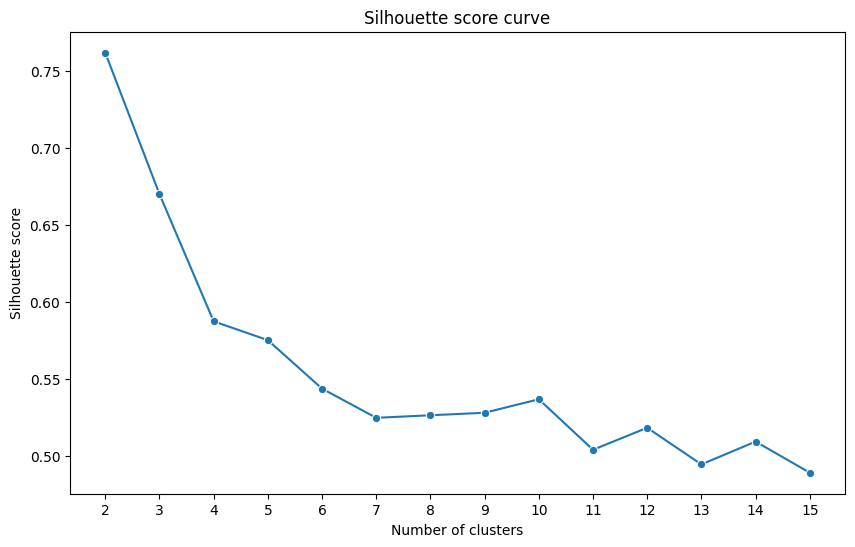

In [10]:
# Instantiate and run the PySparkKMeans class
kmeans_processor = PySparkKMeans(spark, df_rfm)
kmeans_models, silhouette_scores = kmeans_processor.elbow_method_kmeans()

In [13]:
optimal_k = 4

In [14]:
kmeans_processor.visualize_kmeans_clusters(optimal_k)

# Conclusion

---
- As with the previous notebook, we have successfully processed the data and executed the machine learning algorithms. This time, we used PySpark to enhance the scalability of our data processing and machine learning tasks. We ran the KMeans algorithm, identified the optimal number of clusters using the elbow method, and visualized the clusters accordingly. By leveraging PySpark, we achieved efficient scaling of our data processing and machine learning workflows.
- The results remain consistent with the previous notebook, identifying four customer clusters based on their RFM values. Most of the revenue is generated by clusters 0 and 2. These clusters comprise customers who have recently made purchases, frequently shop, and spend considerable amounts. The company should prioritize these customers to boost revenue.

In [15]:
sc.stop()
spark.stop()